<a href="https://colab.research.google.com/github/samanthastaheli/cse450_module2/blob/main/LearningModelRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Document

## Import Pandas and the Data Set

In [48]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [49]:
# campaign["emp.var.rate"].value_counts() #done
# campaign["cons.price.idx"].value_counts() #done
# campaign["cons.conf.idx"].value_counts() #done
# campaign["euribor3m"].value_counts() #done
# campaign["nr.employed"].value_counts() #done
# avg = campaign["nr.employed"].mean() #done
# print(avg)

In [50]:
split_data = campaign.drop(columns=["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"])
split_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   default        41188 non-null  object 
 5   housing        41188 non-null  object 
 6   loan           41188 non-null  object 
 7   contact        41188 non-null  object 
 8   month          41188 non-null  object 
 9   day_of_week    41188 non-null  object 
 10  campaign       41188 non-null  int64  
 11  pdays          41188 non-null  int64  
 12  previous       41188 non-null  int64  
 13  poutcome       41188 non-null  object 
 14  cons.conf.idx  41188 non-null  float64
 15  y              41188 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 3.3+ MB


## One Hot Encode

In [51]:
ml_education = split_data.education.str.replace("basic.4y", '4').str.replace('basic.6y', '6').str.replace('basic.9y', '9').str.replace('high.school', '12').str.replace('professional.course', '14').str.replace('illiterate', '2').str.replace('university.degree', '16').str.replace('unknown', '0').astype('float')

age_bins = [15, 25, 35, 45, 55, 65, 100]
age_labels = ["younger", "young", "middle", "middlish", "old", "older"]

str(age_labels)

ml_age = pd.cut(split_data['age'], bins=age_bins, labels=age_labels).astype(str)

ml_age = pd.get_dummies(ml_age)

ml_answers = split_data.y.str.replace("no", "0").str.replace("yes", '1').astype('float')

ml_pdays = split_data.pdays.replace(999, -1)

ml_onehot = pd.get_dummies(split_data.filter(['job','month','marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']))

C:\Users\sstaheli\AppData\Local\Temp\ipykernel_18472\19264052.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ml_education = split_data.education.str.replace("basic.4y", '4').str.replace('basic.6y', '6').str.replace('basic.9y', '9').str.replace('high.school', '12').str.replace('professional.course', '14').str.replace('illiterate', '2').str.replace('university.degree', '16').str.replace('unknown', '0').astype('float')


In [52]:
final_ml = pd.concat([ml_onehot, 
                         split_data.filter(['campaign', 'previous',
       'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']),
                         ml_pdays,
                         ml_age,
                         ml_education], axis=1)



final_ml = final_ml.drop("job_student", axis = 1, inplace = False)

## View Dataframe Info

In [53]:
final_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_admin.            41188 non-null  uint8  
 1   job_blue-collar       41188 non-null  uint8  
 2   job_entrepreneur      41188 non-null  uint8  
 3   job_housemaid         41188 non-null  uint8  
 4   job_management        41188 non-null  uint8  
 5   job_retired           41188 non-null  uint8  
 6   job_self-employed     41188 non-null  uint8  
 7   job_services          41188 non-null  uint8  
 8   job_technician        41188 non-null  uint8  
 9   job_unemployed        41188 non-null  uint8  
 10  job_unknown           41188 non-null  uint8  
 11  month_apr             41188 non-null  uint8  
 12  month_aug             41188 non-null  uint8  
 13  month_dec             41188 non-null  uint8  
 14  month_jul             41188 non-null  uint8  
 15  month_jun          

## Import Libraries

In [54]:
# Model using poutcome, job, and marital
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Select Features for the Training

In [55]:
features = ['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'campaign',
 'previous',
#  'emp.var.rate',
#  'cons.price.idx',
 'cons.conf.idx',
#  'euribor3m',
#  'nr.employed',
 'pdays',
 'middle',
 'middlish',
 'old',
 'older',
 'young',
 'younger',
 'education']

## Drop NA and Prepare X and y

In [56]:
final_ml = final_ml.dropna()
X = pd.get_dummies(final_ml[features], drop_first=True)
y = ml_answers

## Balance the Data Set

In [57]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_new, y_new = ro.fit_resample(X, y)

## Split into the Train and Test sets and Build the Tree


In [58]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

# Build the decision forest
clf = RandomForestClassifier(n_estimators = 100)

## Train the Model

In [59]:
# Train it
clf.fit(X_train, y_train)

RandomForestClassifier()

## Test the Model

In [60]:
# Test it 
clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)

## The Confusion Matrix

c:\Users\sstaheli\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


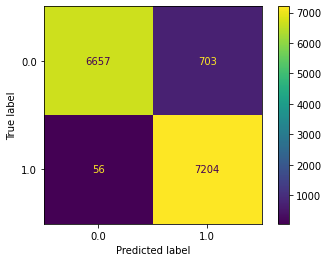

In [61]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X_test, y_test)

## View Stats

In [62]:
stats = metrics.classification_report(y_test, y_predicted, output_dict=True) #creates dict

stats_data = pd.DataFrame(stats).transpose()
stats_data.to_csv('CSV/write_to.csv')
stats_data.to_markdown()

'|              |   precision |   recall |   f1-score |      support |\n|:-------------|------------:|---------:|-----------:|-------------:|\n| 0.0          |    0.991658 | 0.904484 |   0.946067 |  7360        |\n| 1.0          |    0.911091 | 0.992287 |   0.949957 |  7260        |\n| accuracy     |    0.948085 | 0.948085 |   0.948085 |     0.948085 |\n| macro avg    |    0.951375 | 0.948385 |   0.948012 | 14620        |\n| weighted avg |    0.95165  | 0.948085 |   0.947999 | 14620        |'

## View the Tree(s)

In [63]:
# Test it 
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

feature_data = pd.DataFrame(feature_imp).transpose()
feature_data.to_csv('CSV/write_to.csv')
feature_data.to_markdown()

'|    |   campaign |   cons.conf.idx |   education |     pdays |   poutcome_success |   contact_telephone |   housing_yes |   housing_no |   job_admin. |   day_of_week_thu |   day_of_week_mon |   day_of_week_fri |   day_of_week_wed |   day_of_week_tue |   previous |   middle |     young |   marital_married |   job_technician |   job_blue-collar |   marital_single |   loan_no |   contact_cellular |   poutcome_nonexistent |   loan_yes |   middlish |   month_may |   job_services |   marital_divorced |   job_management |   month_jun |   default_no |   month_oct |   default_unknown |   month_mar |        old |   month_apr |   job_self-employed |   month_jul |   month_nov |   month_aug |   job_entrepreneur |   poutcome_failure |    younger |   job_retired |   month_sep |      older |   job_unemployed |   job_housemaid |   housing_unknown |   loan_unknown |   job_unknown |   month_dec |   marital_unknown |   default_yes |\n|---:|-----------:|----------------:|------------:|----------:|-------